<a href="https://colab.research.google.com/github/amina04/CNN-lstm/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**chargement des fichiers qui sont sur drive**





In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


la bibliothéque pandas nous donne le droit de travailler avec la format csv.
On utilise panda pour ouvrir la dataset

In [ ]:
import pandas as pd  

**Donner les noms des column au dataset et spécifier la liste des  string contenu **


In [ ]:

featureV=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flagV=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_typeV=['tcp','udp','icmp']

serviceV=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}    

## **1.Load the data**

In [ ]:
data_train=pd.read_csv('/content/drive/MyDrive/data/nsl-kdd/KDDTrain+.txt',names=featureV)
data_valid=pd.read_csv('/content/drive/MyDrive/data/nsl-kdd/KDDTest+.txt',names=featureV)


data.shape nous donne une vue sur la quantite de data pour train et pour valid(test) et aussi 43 présente le nombre des colonnes

In [ ]:
data_train.shape

(125973, 43)

In [ ]:
data_valid.shape


(22544, 43)

## **2.pre-process the data**


ici on supprimes quelque ligne quand le column service contien ces mots pour avoir la meme taille de data tain et data test

In [ ]:
data_train = data_train.query("service != 'aol'")
data_train = data_train.query("service != 'harvest'")
data_train = data_train.query("service != 'http_2784'")
data_train = data_train.query("service != 'http_8001'")
data_train = data_train.query("service != 'red_i'")
data_train = data_train.query("service != 'urh_i'")
data_train = data_train.query("service != 'printer'")
data_train = data_train.query("service != 'rje'")
#-------------------------------------------------------------------------------->>>>
data_valid = data_valid.query("service != 'printer'")
data_valid = data_valid.query("service != 'rje'")



## **Working with Validation data -Numericalization-**


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#data=données cls=classe binary or multiclass   df=train or test string
def preprocessing(data,cls,df): 
  #----------attack categorization----------------->
  data['label']=data['label'].replace(['normal.','normal'],0)
  #----------------------binary classification--------------------->
  if cls=='binary':
    for i in range(len(binary_attack)):
      data['label'] = data['label'].replace(binary_attack[i], 1)
  #-------------------------splitting features and labels---------------->
  y=data['label']
  #partier de dataset qui contien les strings
  x=data.loc[:,'duration':'hot']
  #-----------------converting to binary feature vectors-------------------------------------->  
  #on va copier column dans un variable 
  
  t=x.protocol_type.copy()
  #puis utiliser la fonction dumies qui transfer en binaire
  t=pd.get_dummies(t)
  #on va supprimer column l original qui contient string 1 ie tout rows de protocole type 
  x=x.drop(columns='protocol_type',axis=1)
  #ajouter nouveau column qui contient binaire
  x=x.join(t)

  t1=x.service.copy()
  t1=pd.get_dummies(t1)
  x=x.drop(columns='service',axis=1)
  x=x.join(t1)

  t2=x.flag.copy()
  t2=pd.get_dummies(t2)
  x=x.drop(columns='flag',axis=1)
  x=x.join(t2)
#mettre tout les valeurs entre 0 et 1  normalization
  x = MinMaxScaler(feature_range=(0, 1)).fit_transform(x)
  #------------------------------------------------------------------------------>
  #-----------------converting to binary label vectors  train--------------------------------------> 
  yt=y.copy()
  yt=pd.get_dummies(yt)
#------------------------------------------------------------------------------>
  return x,yt
  #if df=='train':
    #retourner les val et label
   # return x,yt
 # else:
  #  return x,yt

In [ ]:
#le 1 er var sera pour features et 2em pour label
x_valid,y_valid=preprocessing(data_valid,cls='binary',df='valid')
x_train,y_train=preprocessing(data_train,cls='binary',df='train')
y_train.shape


(125793, 2)

In [ ]:
import numpy as np
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape





(125793, 83, 1)

In [ ]:
x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))
x_valid.shape



(22525, 83, 1)

## **3.Define the model**



In [ ]:
#instancier le modéle
from tensorflow.keras.models import Sequential
model=Sequential()
#Créer la couche entrée totalement connecté avec la couche dense
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D , AveragePooling1D,BatchNormalization
from tensorflow.keras.layers import LeakyReLU



In [ ]:
#model.add(Conv1D(32,3, padding="same",activation="relu",input_shape = (x_train.shape[1], 1)))
model.add(Conv1D(32,kernel_size =5,padding="same",input_shape = (x_train.shape[1], 1) ,activation='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=2))
model.add(Dropout(0.05))
#model.add(MaxPooling1D(pool_size=(4)))
model.add(Flatten())
#model.add(Dropout(0.5))
#(83*32)/4=664
model.add(Dense(units=664,activation='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(Dense(2, activation="softmax"))

In [ ]:
model.summary() #sert afficher résumé

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 83, 32)            192       
                                                                 
 batch_normalization (BatchN  (None, 83, 32)           128       
 ormalization)                                                   
                                                                 
 average_pooling1d (AverageP  (None, 41, 32)           0         
 ooling1D)                                                       
                                                                 
 dropout (Dropout)           (None, 41, 32)            0         
                                                                 
 flatten (Flatten)           (None, 1312)              0         
                                                                 
 dense (Dense)               (None, 664)               8

**The learning rate** is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.

The learning rate may be the most important hyperparameter when configuring your neural network. Therefore it is vital to know how to investigate the effects of the learning rate on model performance and to build an intuition about the dynamics of the learning rate on model behavior.

## **4.Compile the model**

In [ ]:
from tensorflow import keras
#opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer ='adam',loss = 'categorical_crossentropy', metrics = ['accuracy',keras.metrics.Precision()])


## **5.Fit the model**

In [ ]:
#model.fit(x_train, y_train, epochs = 100, batch_size =1000)
model.fit(x_train, y_train, epochs =85,batch_size =1000,validation_data=(x_valid,y_valid))

Epoch 1/85
126/126 [==============================] - 14s 25ms/step - loss: 0.1415 - accuracy: 0.9537 - precision: 0.9537 - val_loss: 0.5411 - val_accuracy: 0.7828 - val_precision: 0.7828
Epoch 2/85
126/126 [==============================] - 2s 18ms/step - loss: 0.1163 - accuracy: 0.9613 - precision: 0.9613 - val_loss: 0.4951 - val_accuracy: 0.7839 - val_precision: 0.7839
Epoch 3/85
126/126 [==============================] - 2s 17ms/step - loss: 0.1030 - accuracy: 0.9623 - precision: 0.9623 - val_loss: 0.4293 - val_accuracy: 0.7837 - val_precision: 0.7837
Epoch 4/85
126/126 [==============================] - 2s 17ms/step - loss: 0.0903 - accuracy: 0.9672 - precision: 0.9672 - val_loss: 0.4285 - val_accuracy: 0.7763 - val_precision: 0.7763
Epoch 5/85
126/126 [==============================] - 2s 19ms/step - loss: 0.0857 - accuracy: 0.9685 - precision: 0.9685 - val_loss: 0.4823 - val_accuracy: 0.7987 - val_precision: 0.7987
Epoch 6/85
126/126 [==============================] - 2s 17ms/st

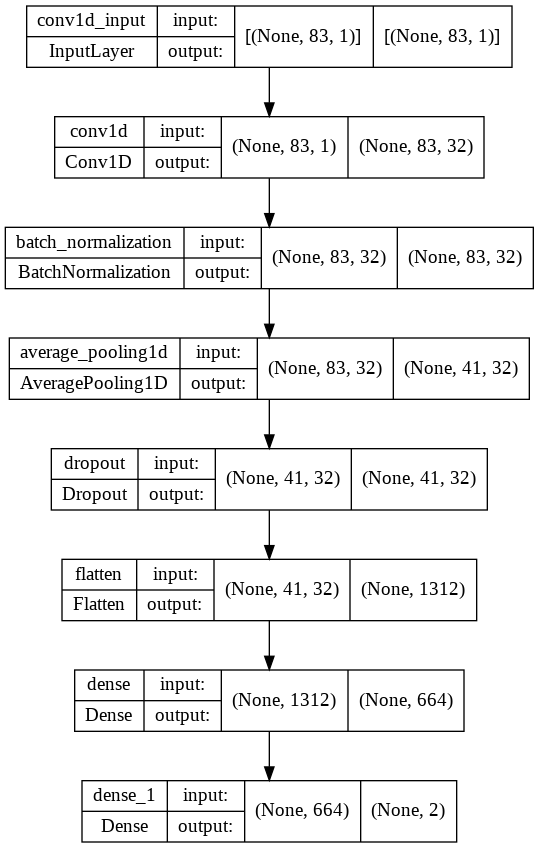

In [ ]:
keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)